## **Data Preview**

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Dataset Citations

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

#**Load data** 

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('cancer_classification.csv')

In [30]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Visualizations will help us understand our data!**

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

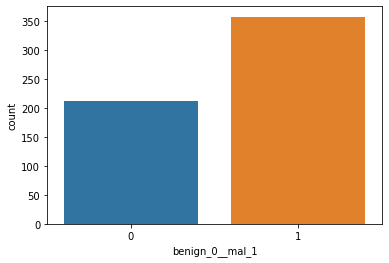

In [32]:
sns.countplot(x="benign_0__mal_1", data=df)

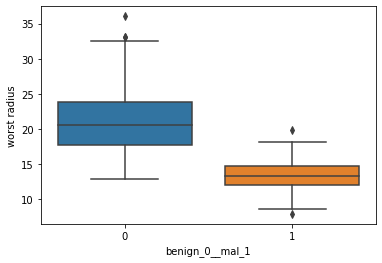

In [33]:
sns.boxplot(x="benign_0__mal_1", y="worst radius", data=df)

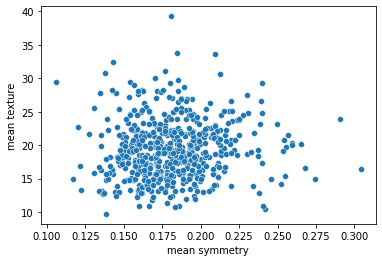

In [34]:
sns.scatterplot(x="mean symmetry", y="mean texture", data=df)

#**Data Split**

In [35]:
#Separate network input and labels into 2 arrays
X = df.drop('benign_0__mal_1',axis=1).values 
y = df["benign_0__mal_1"].values

In [36]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [37]:
X.shape

(569, 30)

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [39]:
y.shape

(569,)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#train_test_split has 4 outputs by default
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
#converts 25% of our dataset into test data

In [42]:
X_train.shape

(426, 30)

In [43]:
X_test.shape

(143, 30)

#**Data Normalization**

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
#.fit finds the min and max values for each column
#.fit is ONLY called for training data (X_train) 
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [47]:
#apply scalling to both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#**Neural Network Architecture**

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [64]:
#Initialize empty model
model = Sequential()

In [65]:
#Add layers to model
model.add(Dense(units=30,activation='relu')) #30 units(neurons) because X_train has 30 parameters
model.add(Dense(units=15,activation='relu')) #15 units(neurons) because we can pick a number of our discretion
model.add(Dense(units=1,activation='sigmoid')) 

In [66]:
#specify loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
#binary crossentropy because we are dealing with a binary classification problem
#the cell is benign or malignant, thus binary classification

# **Train AI**

In [67]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6992 - val_loss: 0.6676
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6646 - val_loss: 0.6392
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6293 - val_loss: 0.6060
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5888 - val_loss: 0.5670
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5530 - val_loss: 0.5209
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5092 - val_loss: 0.4687
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4603 - val_loss: 0.4142
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4070 - val_loss: 0.3534
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3425 - val_loss: 0.3056
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2987 - val_loss: 0.2677
Epoch 11

#**Evaluate Performance**

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
model_loss = pd.DataFrame(model.history.history)

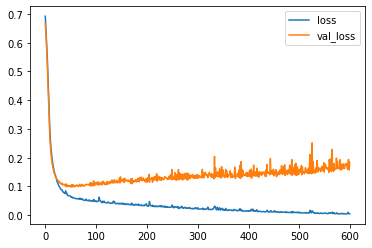

In [70]:
model_loss.plot()
#slight overfitting observed

In [55]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [71]:
print(classification_report(y_test,predictions))
#want to maximize accuracy

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.99      0.91      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.95      0.93       143
weighted avg       0.94      0.94      0.94       143



In [75]:
columns = ["Actually Positive", "Actually Negative"]
rows  = ["Predicted Positive", "Predicted Negative"]

In [86]:
confusion = pd.DataFrame(confusion_matrix(y_test,predictions), index=rows, columns=columns)
confusion_desc = pd.DataFrame([["True Positives", "False Positives"],["False Negatives", "True Negatives"]])

In [84]:
confusion
# based on the nature of the classification, we might want more false positives than false negatives, or vice versa

,Actually Positive,Actually Negative
Predicted Positive,54,1
Predicted Negative,8,80


In [85]:
confusion_desc

,0,1
0,True Positives,False Positives
1,False Negatives,True Negatives
